# EXPLORATORY DATA ANALYSIS OF AMES HOUSING DATASET

In this notebook, we will analyse the target variable and its relationship with independant variables. This will help in selecting predictive variables. 

In [1]:
#Imports and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train=pd.read_csv('train.csv')

## Wrangling

Data wrangling has been detailed in another file. Here, the code is given below.

In [3]:
# Creating seperate columns lists for each dtype
from pandas.api.types import is_numeric_dtype
numcollist=[col for col in train.drop('Id', axis=1).columns if is_numeric_dtype(train[col]) ]
ordlist=[col for col in numcollist if train[col].nunique() < 16 ]
yearlist=['YearBuilt','YearRemodAdd','GarageYrBlt']

for col in ordlist:
    numcollist.remove(col)
for col in yearlist:
    numcollist.remove(col)
    
categlist=[col for col in train.drop('Id', axis=1).columns if not is_numeric_dtype(train[col])]

categlist=categlist+ ordlist

### Categorical variables indicating absence of a numeric feature.
As per earlier observations on zero values in Data Wrangling section, I suggested to create seperate categoric variable for each numeric one, presence and absence of zero value as 1 and 0. 

In [4]:
# Creating new categorical variables
for col in numcollist:
    if 0 in train[col].values:
        train['zero'+col]=np.where(train[col]==0,1,0)
        categlist.append('zero'+col)

In [5]:
# Imputation od Nan and zero's
train[numcollist]=train[numcollist].replace(0, np.nan).interpolate(kind='linear',limit_direction='both')
train[categlist]=train[categlist].fillna('Absent')


## Target Variable 'SalePrice'

We will look at the following:
1. Distribution plot of SalePrice alongside kde plot of a normal distribution. 
2. Develop a cumulative distribution of Sale Price alongside cumulative normal distribution.


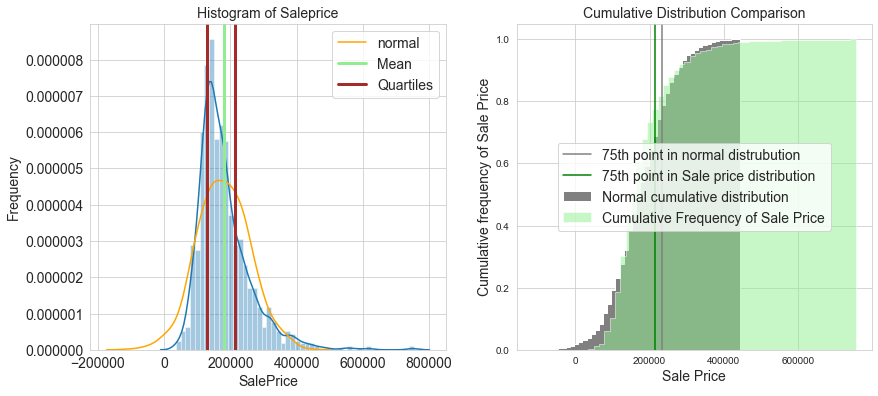

In [6]:
# Sample of normal distribution
normal = np.random.normal(np.mean(train['SalePrice']), np.std(train['SalePrice']), size=len(train))
#Distribution plot of SalePrice alongside kde plot of a normal distribution. 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'], norm_hist=False, kde = True, bins=50)
sns.kdeplot(normal, color='orange', label='normal')
plt.axvline(train['SalePrice'].mean(), color='lightgreen', linewidth=3, label='Mean')
plt.axvline(np.percentile(train['SalePrice'],25), color='brown', linewidth=3, label='Quartiles')
plt.axvline(np.percentile(train['SalePrice'],75), color='brown', linewidth=3)
plt.xlabel('SalePrice',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of Saleprice',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

#Plotting cumulative distribution of Sale Price and cumulative normal distribution for comparison.
plt.subplot(1,2,2)
plt.hist(normal, cumulative=True, density=True, color='grey',histtype='stepfilled',rwidth=None, bins=50, label='Normal cumulative distribution')
plt.hist(train['SalePrice'], cumulative=True, density=True, color='lightgreen',histtype='stepfilled',rwidth=None,alpha=.5, bins=50, label='Cumulative Frequency of Sale Price')
plt.legend(loc='upper left', fontsize=14)
plt.axvline(np.percentile(normal, 75), color='grey' ,label='75th point in normal distrubution')
plt.axvline(np.percentile(train['SalePrice'], 75), color='green',label='75th point in Sale price distribution')
plt.xlabel('Sale Price',fontsize=14)
plt.ylabel('Cumulative frequency of Sale Price',fontsize=14)
plt.title('Cumulative Distribution Comparison',fontsize=14)
plt.legend(loc='center',fontsize=14)


__Observations:__

1.The distribution is not normal. Mean Saleprice and median Saleprice, both have lower probabilities of occurence than the mode.
2. Distribution of SalePrice is leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian.
3. The distribution is right skewed. The range of upper 25% of data is around 60000 which is 3 times more that the Interquartile range.
4. Mean Saleprice is not a good representation and there are quite a number of outliers.
5. The cumulative distribution comparison makes it very clear that SalePrice does not conform to a normal pattern. There is also greater chance of SalePrice in range 100000 to 300000 occuring in comparison to what a normal distribution should have. We can also see that the range of upper 25% of Sale Price is abnormally greater than normal pattern.

## Log transformation of Target Variable 'SalePrice'

We convert the SalePrice to its log equivlent, repeat the plots and see whether it conforms to normal distribution.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

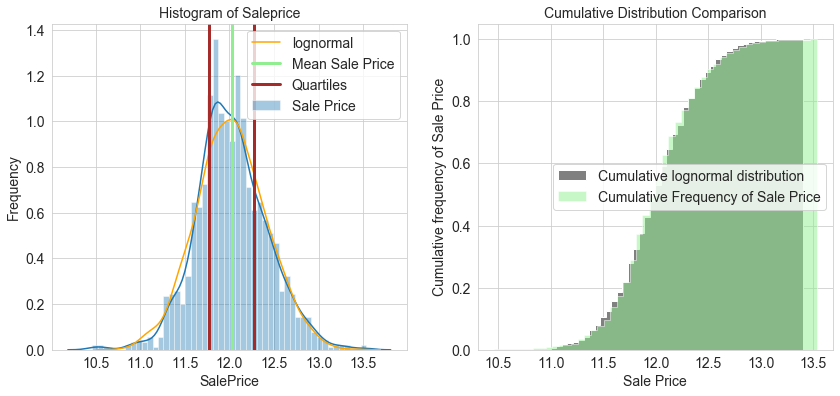

In [7]:
# We create a sample of lognormal distribution
lognormal = np.random.normal(np.mean(np.log(train['SalePrice'])), np.std(np.log(train['SalePrice'])), size=len(train))
# Distribution plot of SalePrice alongside kde plot of a lognormal distribution. 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(np.log(train['SalePrice']), norm_hist=False, kde = True, bins=50, label='Sale Price')
sns.kdeplot(lognormal, color='orange', label='lognormal')
plt.axvline(np.log(train['SalePrice']).mean(), color='lightgreen', linewidth=3, label='Mean Sale Price')
plt.axvline(np.percentile(np.log(train['SalePrice']),25), color='brown', linewidth=3, label='Quartiles')
plt.axvline(np.percentile(np.log(train['SalePrice']),75), color='brown', linewidth=3)
plt.xlabel('SalePrice',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of Saleprice',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

#Plotting cumulative distribution of Sale Price and cumulative lognormal distribution for comparison.
plt.subplot(1,2,2)
#plt.figure(figsize=(5,5))
plt.hist(lognormal, cumulative=True, density=True, color='grey',histtype='stepfilled',rwidth=None, bins=50, label='Cumulative lognormal distribution')
plt.hist(np.log(train['SalePrice']), cumulative=True, density=True, color='lightgreen',histtype='stepfilled',rwidth=None,alpha=.5, bins=50, label='Cumulative Frequency of Sale Price')
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Sale Price',fontsize=14)
plt.ylabel('Cumulative frequency of Sale Price',fontsize=14)
plt.title('Cumulative Distribution Comparison',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

__Observations__
The distribution of 'SalePrice' is very close to lognormal distribution.
The tails are matching, though 'SalePrice' appears to be bimodal.
The the range above upper quartile has normalised to quiet an extent.
The cumulative distribution of Saleprice is very close to cumulative lognormal distribution.

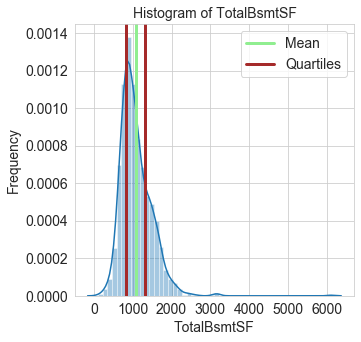

In [8]:
col='TotalBsmtSF'

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.distplot(train[col], norm_hist=False, kde = True, bins=50)

plt.axvline(train[col].mean(), color='lightgreen', linewidth=3, label='Mean')
plt.axvline(np.percentile(train[col],25), color='brown', linewidth=3, label='Quartiles')
plt.axvline(np.percentile(train[col],75), color='brown', linewidth=3)
plt.xlabel(col,fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Histogram of ' +col,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [9]:
def plot_variable(col):
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,1)
    sns.distplot(train[col], norm_hist=False, kde = True, bins=50)
    plt.axvline(train[col].mean(), color='lightgreen', linewidth=3, label='Mean')
    plt.axvline(np.percentile(train[col],25), color='brown', linewidth=3, label='Quartiles')
    plt.axvline(np.percentile(train[col],75), color='brown', linewidth=3)
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.title('Histogram of ' +col,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
     
    plt.subplot(1,2,2)    
    sns.boxplot(y=train[col])
    
    plt.figure(figsize=(11,5))
    plt.subplot(1,2,1)   
    sns.distplot(np.log(train[col]), norm_hist=False, kde = True, bins=50)
    plt.axvline(np.log(train[col]).mean(), color='lightgreen', linewidth=3, label='Mean')
    plt.xlabel(col,fontsize=14)
    plt.title('Histogram of log transformed ' + col,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    

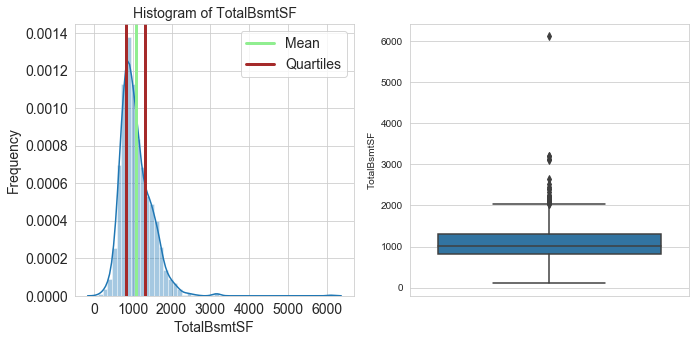

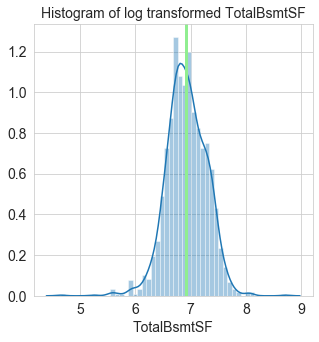

In [10]:
plot_variable('TotalBsmtSF')

In the first figure, we can see that the distribution is not normal as it is right-skewed and has infrequent high-value outliers. The boxplot shows few observations in the outlier range with and a single observation taking the maximum value of 6000. Almost 50% of the range is represented by high value points. The log transformed variable looks more close to a normal distribution.

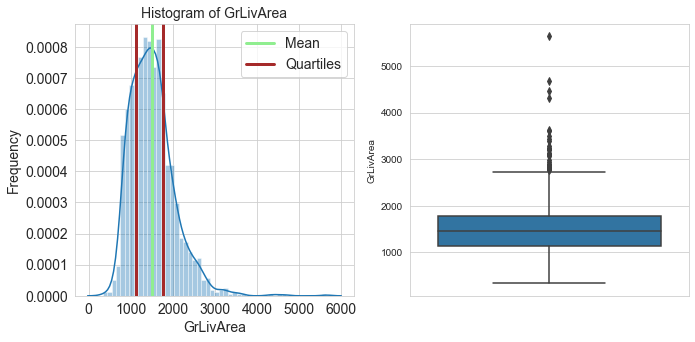

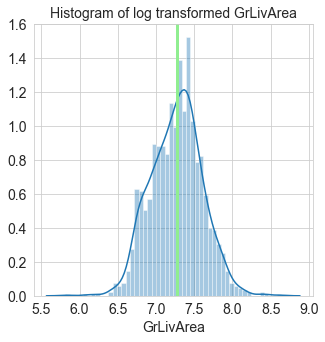

In [11]:
plot_variable('GrLivArea')

This variable has a right-skewed distribution and with outliers in the top 50% of its range. Log transformations has reduced skewness.

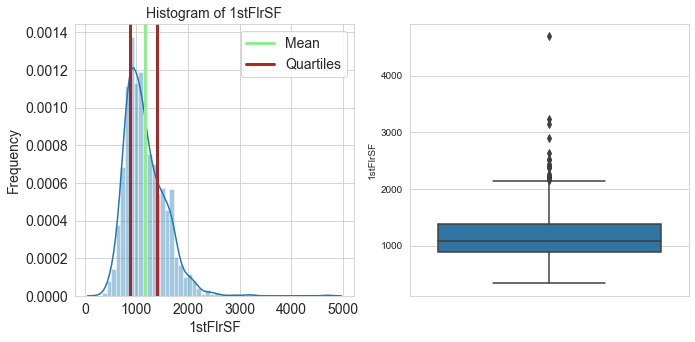

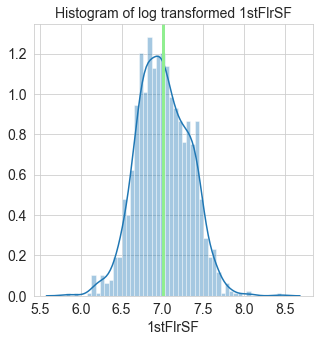

In [12]:
plot_variable('1stFlrSF')

Observations of 1stFlrSF are similar to TotalBsmtSF.

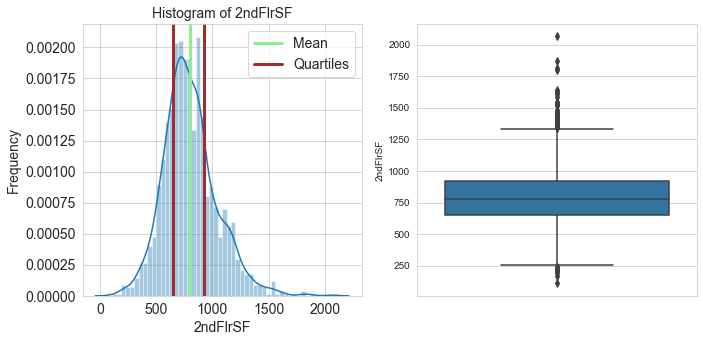

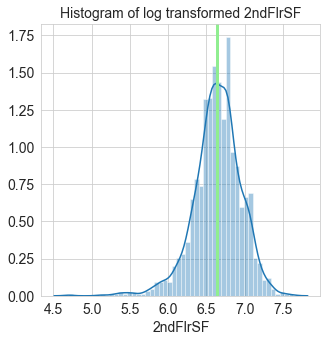

In [13]:
plot_variable('2ndFlrSF')

This variable is again right-skewed. The boxplot also shows several outlier points.Log -transformation removed the skewness but shows some infrequent low value outliers

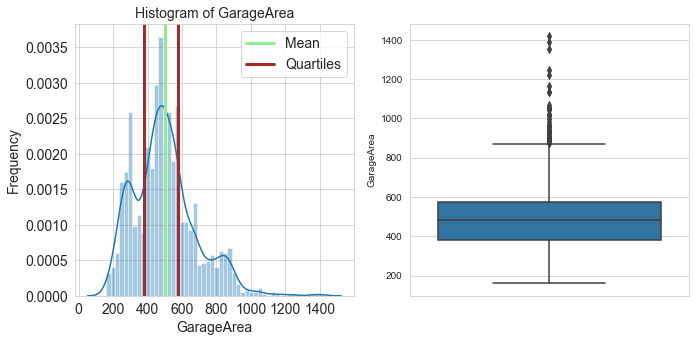

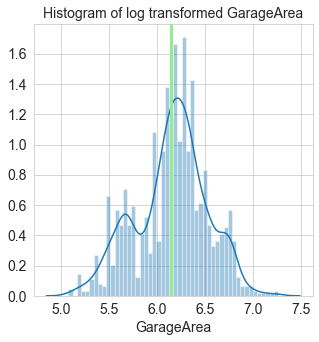

In [14]:
plot_variable('GarageArea')

This variable has a bimodal frequency and is right skewed with high value outliers. The boxplot shows that the outlier points are many to deal with.

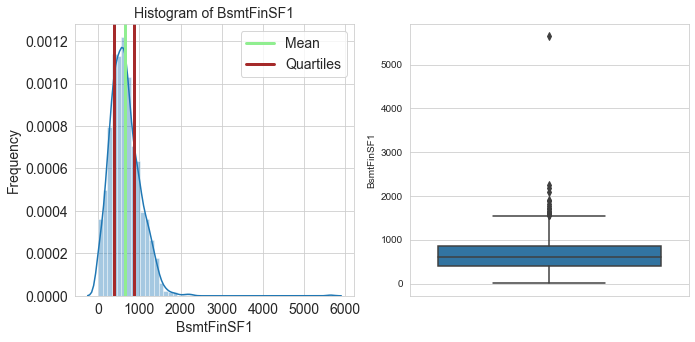

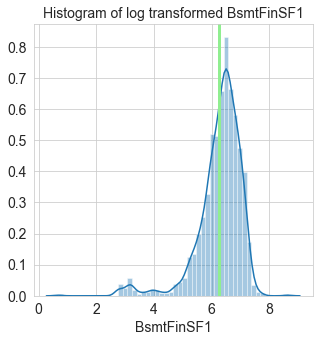

In [15]:
plot_variable('BsmtFinSF1')

This variable has some high value outliers grabbing almost 66% of the range.The boxplot shows that these observations are few with a single highest point of around 6000, far from the crowd. The log transformation has reduced the influence of outliers.

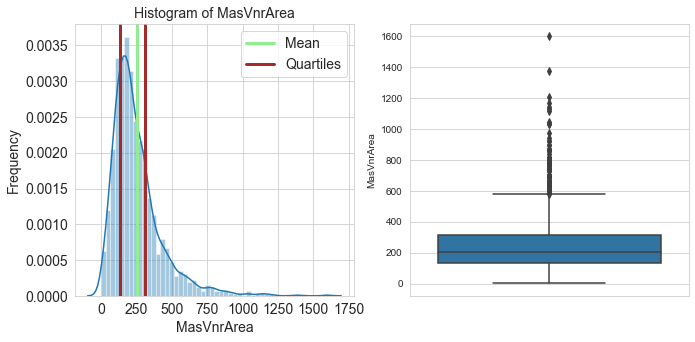

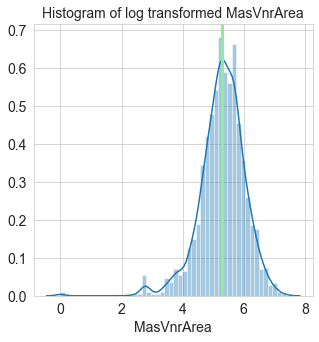

In [16]:
plot_variable('MasVnrArea')

The variable is right skewed and has very high value outliers. Almost 70% of the range is on its right tail.The boxplot shows that almost 70% of observations are outliers. The log transformation is closer to normal and it has reduced the influence of outliers.

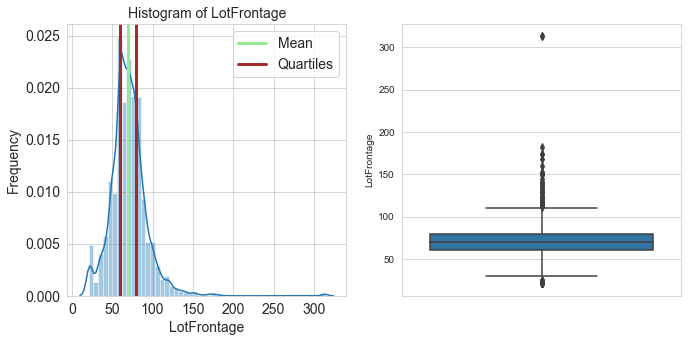

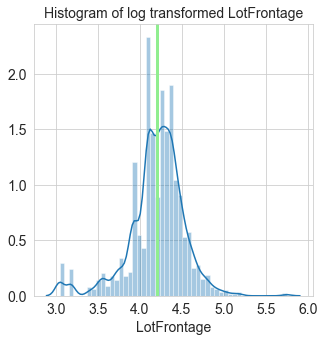

In [17]:
plot_variable('LotFrontage')

This variable also has a  right-skewed distribution. The boxplot shows a single point of value 350 in comparison to the 75th obsevation of around 110. The log transformation ahs reduced the influence of high value outliers.

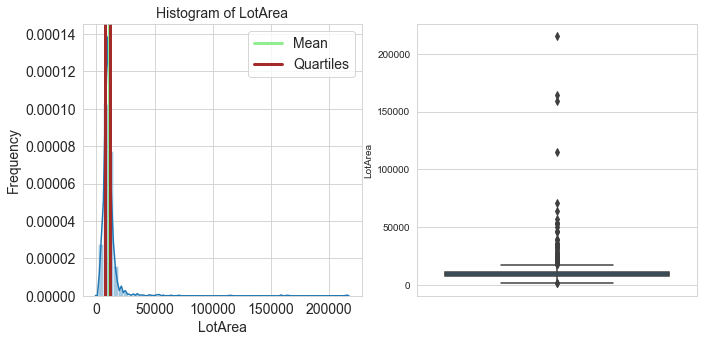

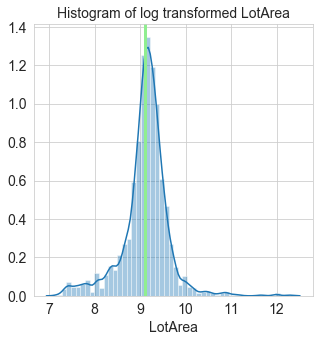

In [18]:
plot_variable('LotArea')

This variable has many missing values and has mximum observations in the outlier section. This variable which looks so abnormal, is well normalised with the log transformation.

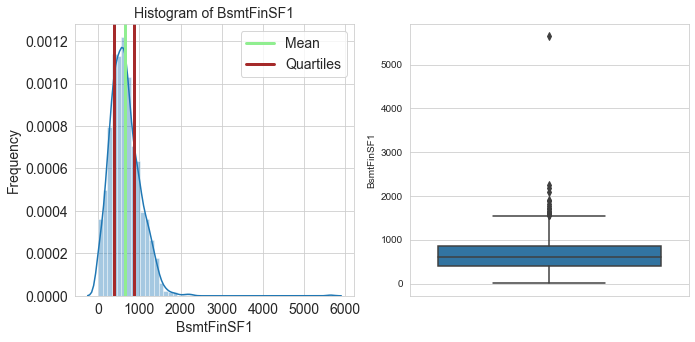

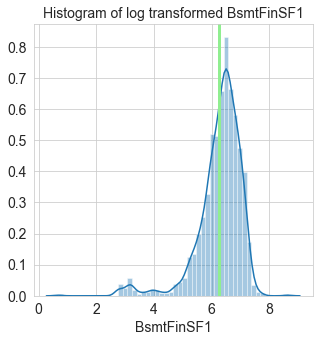

In [19]:
plot_variable('BsmtFinSF1')

This variable has a right skewed distribution with a significating outlier

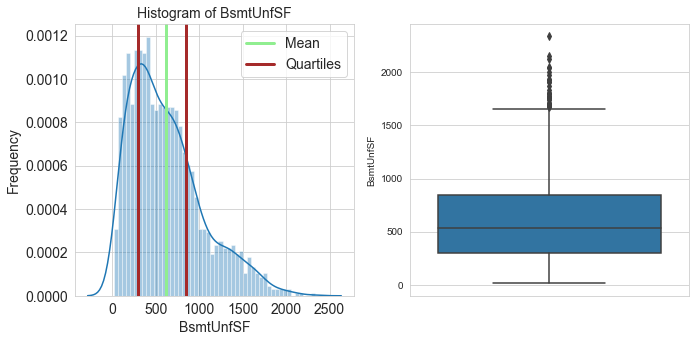

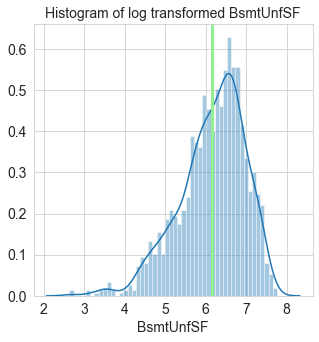

In [20]:
plot_variable('BsmtUnfSF')

The distribution of this variable is right-skewed with hight value outliers. The log transformation has reduced the influence of these outliers.

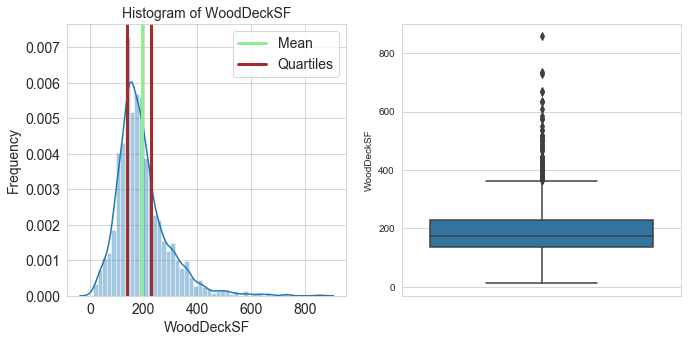

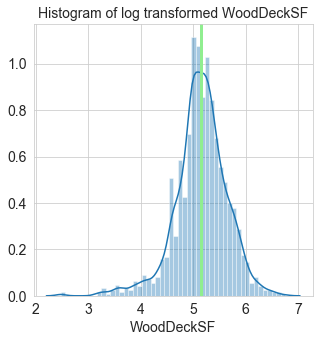

In [21]:
plot_variable('WoodDeckSF')

This variable has a right-skewed distribution with many high value points, lying significantly far from its upper quartile. The log transformation has reduced the skewness and influence of the outliers.

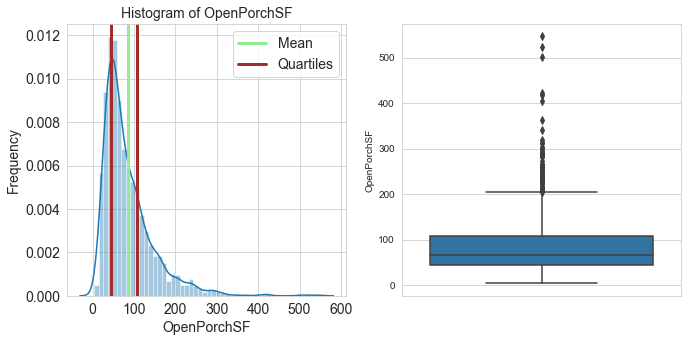

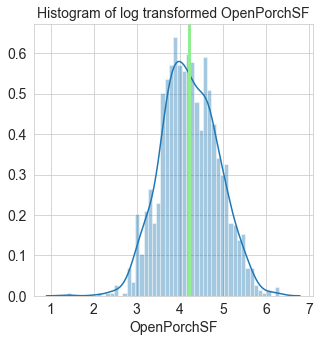

In [22]:
plot_variable('OpenPorchSF')

This variable has a right-skewed distribution with many high value points, lying significantly far from its upper quartile. The log transformation has reduced the skewness and influence of the outliers.

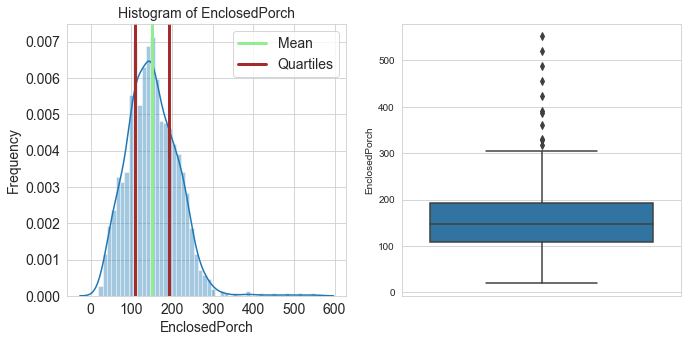

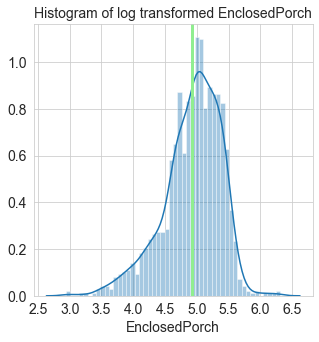

In [23]:
plot_variable('EnclosedPorch')

This variable has a right-skewed distribution with few high value points. The log transformation has reduced the skewness and influence of the outliers.

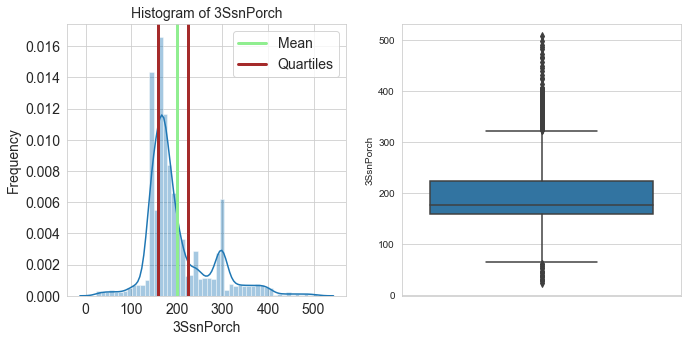

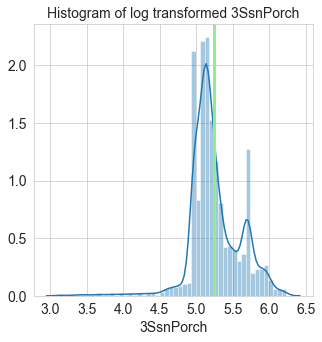

In [24]:
plot_variable('3SsnPorch')

This variable has a right_skewed, bimodal distribution, with many outliers. The log transformation has reduced skewness and influence of outliers.

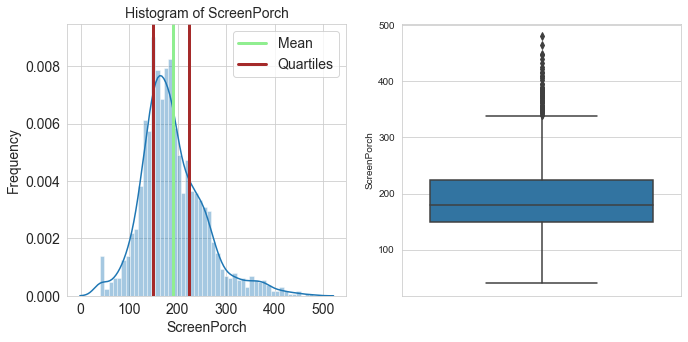

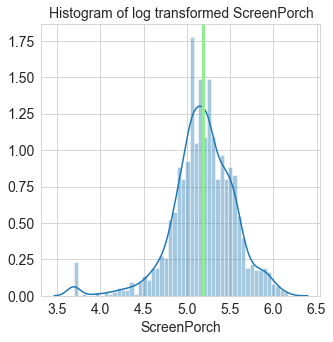

In [25]:
plot_variable('ScreenPorch')

This variable has a right_skewed distribution, with many outliers. The log transformation has reduced skewness and influence of outliers.

In [26]:
train[(train['BsmtFinSF1']>5000)  | (train['LotFrontage']>300) | (train['BsmtFinSF1']>5000) | (train['TotalBsmtSF']>5000) | (train['1stFlrSF']>5000) ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,zeroMasVnrArea,zeroBsmtFinSF1,zeroBsmtFinSF2,zeroBsmtUnfSF,zeroTotalBsmtSF,zero2ndFlrSF,zeroLowQualFinSF,zeroGarageArea,zeroWoodDeckSF,zeroOpenPorchSF,zeroEnclosedPorch,zero3SsnPorch,zeroScreenPorch,zeroMiscVal
934,935,20,RL,313.0,27650,Pave,Absent,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,159.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,442.666667,160.0,585.0,GasA,Ex,Y,SBrkr,2069,1002.375,184.048387,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505.0,TA,TA,Y,169.333333,37.666667,43.294118,114.578947,215.800,0,Absent,Absent,Absent,501.951220,11,2008,WD,Normal,242000,1,0,1,0,0,1,1,0,1,1,1,1,1,1
1298,1299,60,RL,313.0,63887,Pave,Absent,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,842.538462,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950.000,284.397727,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418.0,TA,TA,Y,214.000000,292.000000,128.571429,250.145455,237.125,480,Gd,Absent,Absent,932.894737,1,2008,New,Partial,160000,0,0,1,0,0,0,1,0,0,0,1,1,1,1


## 'SalePrice' Relationship with Independent numerical variables

In [27]:
# Calculating correlation coefficients between SalePrice and Numerical independent variables
train[numcollist].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
1stFlrSF         0.605852
TotalBsmtSF      0.597630
GarageArea       0.582196
BsmtFinSF1       0.367187
2ndFlrSF         0.362628
LotFrontage      0.310673
LotArea          0.263843
MasVnrArea       0.231575
BsmtUnfSF        0.158205
WoodDeckSF       0.133102
BsmtFinSF2       0.057038
OpenPorchSF      0.041874
EnclosedPorch    0.014706
LowQualFinSF     0.008487
ScreenPorch     -0.002793
MiscVal         -0.010824
3SsnPorch       -0.015048
Name: SalePrice, dtype: float64

Note: We will scale the dataframe using formula (x- x.mean())/x.std(). We are doing this for a comparative view of numeric variables in scatter plots.

In [28]:
#Standardising dataframe.
scaleddf=(train[numcollist]-train[numcollist].mean())/train[numcollist].std()


(-3, 8)

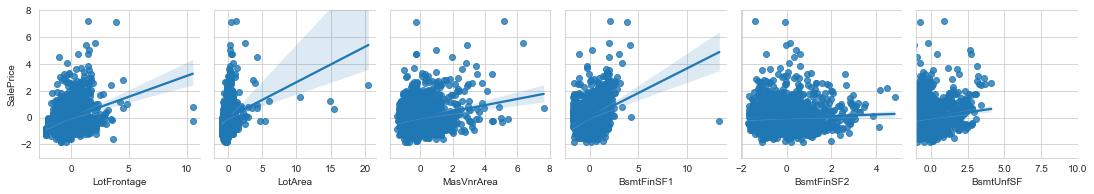

In [29]:
# Regression Scatter plots of 'Saleprice with numerical independant variables from Standardised dataframe using PairGrid'
g = sns.PairGrid(data=scaleddf, x_vars=numcollist[0:6],  y_vars='SalePrice')
g.map(sns.regplot)
plt.xlim((-1,10))
plt.ylim((-3,8))


__Observations:__
1. SalePrice has non constant variance with Variables LotFrontage, LotArea, MasVnrArea and BsmtFinSF1. Linear relationship cannot be clearly established. 

2. BsmtUnfSF  and BsmtFinSF2 both are weakly correlated with SalePrice.

3. SalePrice shows weak  linear relationship with  BsmtFinSF1  and has non constant variance.

(-3, 8)

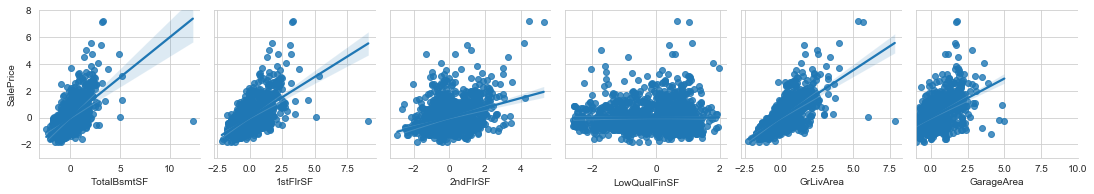

In [30]:
g = sns.PairGrid(data=scaleddf, x_vars=numcollist[6:12],  y_vars='SalePrice')
g.map(sns.regplot)
plt.xlim((-1,10))
plt.ylim((-3,8))

__Observations__

1. TotalBsmtSF and FirstFlrSF have a correlation of .6 with SalePrice though relationship is somewhat linear. Variance in SalePrice increases  as these independent variable increases , for eg we see a range from 100000 to 400000 with both these variables.Both these variables impact the average SalePrice. There is an outlier in both cases.

2. The variance in SalePrice is non constant with SecondFlrSF with a weak linear relationship. It has a .3 correlation with SalePrice.

3. GrLivArea and GarageArea have .7 and .58 correlation with SalePrice. 
SalePrice variance increases with higher values of GrLivArea and eventually spreads out of the group at few very high values. 
SalePrice has a constant variance,  with GarageArea and here too it has outliers.
GrLivArea shows some linearity with SalePrice.

(-3, 8)

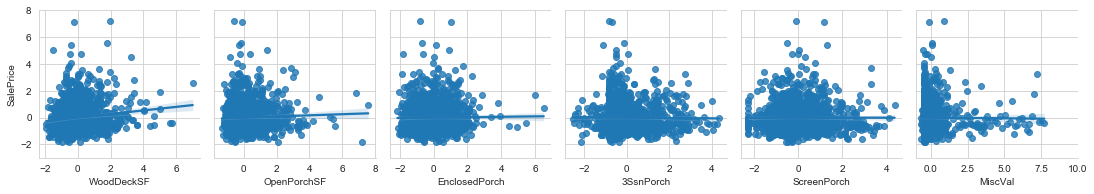

In [31]:
g = sns.PairGrid(data=scaleddf, x_vars=numcollist[12:18],  y_vars='SalePrice')
g.map(sns.regplot)
plt.xlim((-1,10))
plt.ylim((-3,8))

__Observations__:
WoodDeckSF and OpenPorchSF have .3 correlation with SalePrice. Again variance in SalePrice is not constanct. SalePrice has outliers in both cases. There is no linear relationship. 

Lets see how these variables are correlated wth each other..

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text yticklabel objects>)

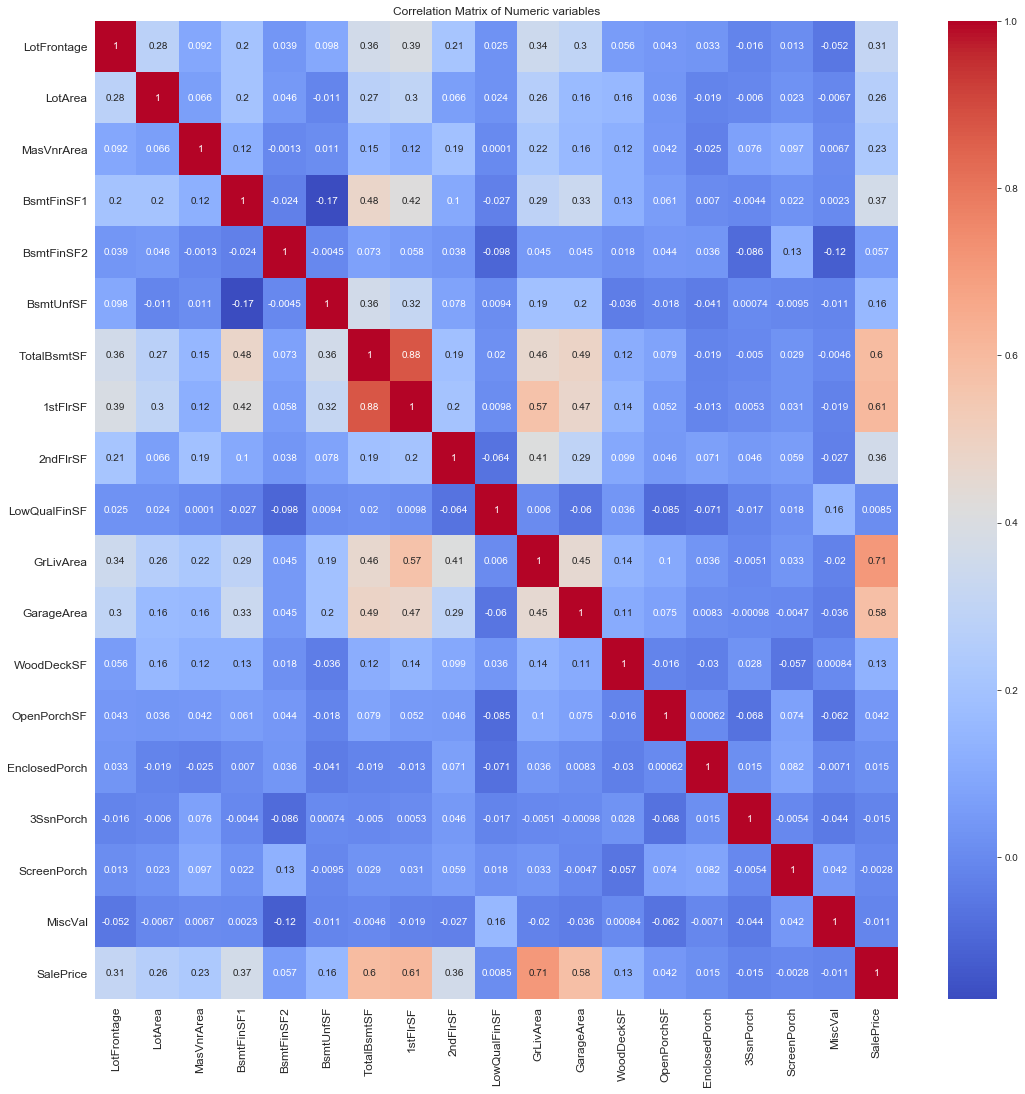

In [32]:
# Plotting heatmap
plt.figure(figsize=(18,18))
sns.heatmap(train[numcollist].corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Matrix of Numeric variables',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

<Figure size 1296x1296 with 0 Axes>

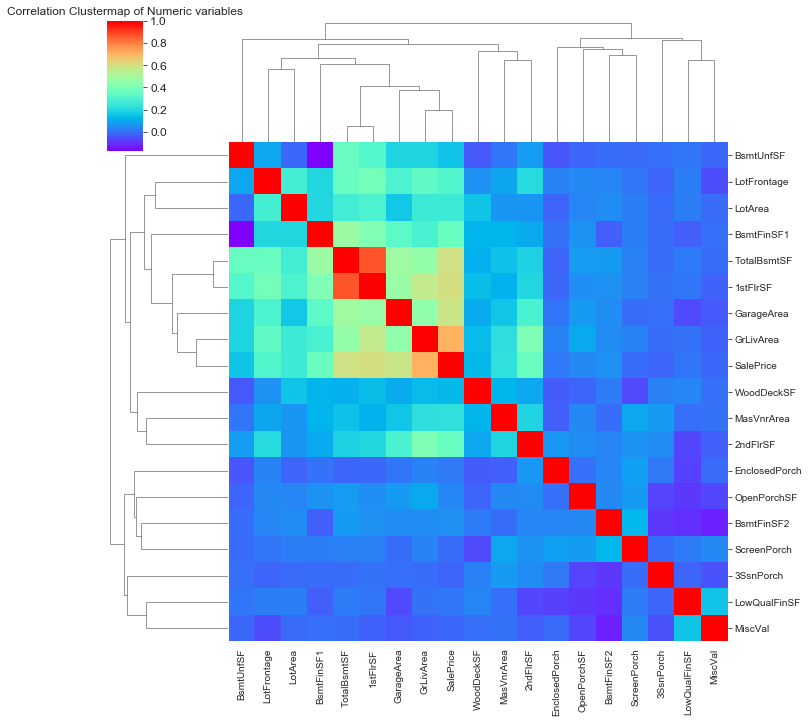

In [33]:
# Plotting clustermap
plt.figure(figsize=(18,18))
sns.clustermap(train[numcollist].corr(), cmap='rainbow')
plt.title('Correlation Clustermap of Numeric variables',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


__Observations on correlation__:
There are lot of variables which have a correlation with each other.
1. TotalBsmtSF nad 1stFlrSF have a high correlation with each other i.e .88.
2. GrLivArea and  TotalBsmtSF have correlation of .61.
3. There is multicolinearity between variables- MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea and GarageArea

### Independent variable GrLivArea and its transformation

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

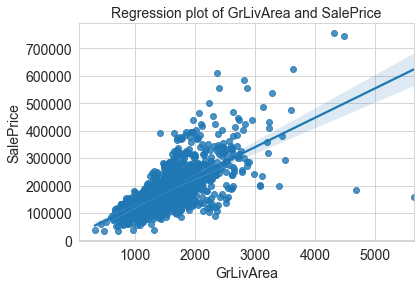

In [34]:
# Plotting regression plot of GrLivArea and SalePrice.
sns.regplot('GrLivArea', 'SalePrice', data=train)
plt.xlabel('GrLivArea',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.title('Regression plot of GrLivArea and SalePrice',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


__Analysis of GrLivArea:__

We have seen earlier that some variables have high correlation with each other and linear relation with SalePrice is also similar. 

On this basis we create a new variable- 'newsqvar' which is a combination of 'TotalBsmtSF','1stFlrSF' and 'GrLivArea'. 
Let's take the log value of this variable and see the rgression plot with SalePrice.

(array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. ]),
 <a list of 9 Text yticklabel objects>)

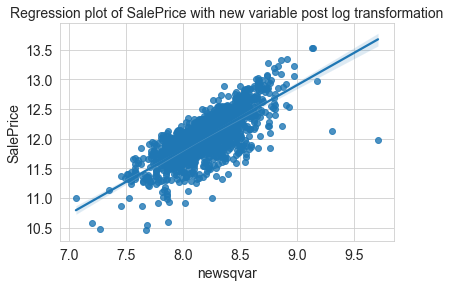

In [35]:
# Creating new variable
train['newsqvar']=train['TotalBsmtSF']+train['1stFlrSF']+train['GrLivArea']
# Regression plot of SalePrice with new variable post log transformation
sns.regplot(np.log(train['newsqvar']), np.log(train['SalePrice']), data=train)
plt.xlabel('newsqvar',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.title('Regression plot of SalePrice with new variable post log transformation',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


In [36]:
#Calculating correlation of newsqvar with SalePrice
train[['SalePrice','newsqvar']].corr()

,SalePrice,newsqvar
SalePrice,1.000000,0.746593
newsqvar,0.746593,1.000000


__Great! This new variable has a strong linear relation with SalePrice and a constant variance as well. The correlation also has improved from .70 to .76
We can also view this transformation in a histogram.__

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 <a list of 9 Text yticklabel objects>)

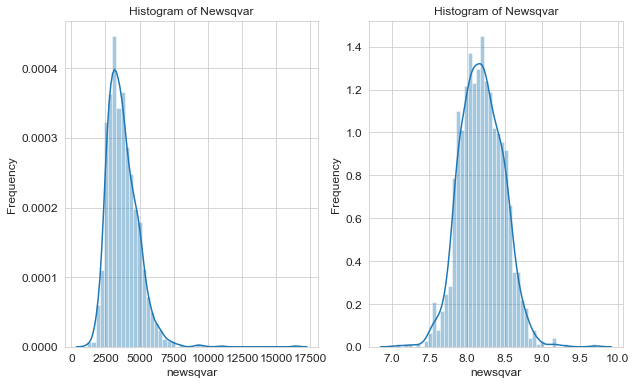

In [37]:
#Plotting histogram
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(train['newsqvar'], norm_hist=False, kde = True, bins=50)
plt.xlabel('newsqvar',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Newsqvar',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.distplot(np.log(train['newsqvar']), norm_hist=False, kde = True, bins=50)
plt.ylabel('Frequency')
plt.xlabel('newsqvar',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Newsqvar',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


## 'SalePrice' Relationship with Independent categorical variables

In [38]:
def plot_catvariable(col):
    plt.figure(figsize=(12,8))
    sns.swarmplot( col,  'SalePrice', data=train)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    plt.title('Swarm Plot of SalePrice vs '+col,fontsize=12)
    plt.xticks(rotation=60,fontsize=12)
    plt.yticks(fontsize=12)
    

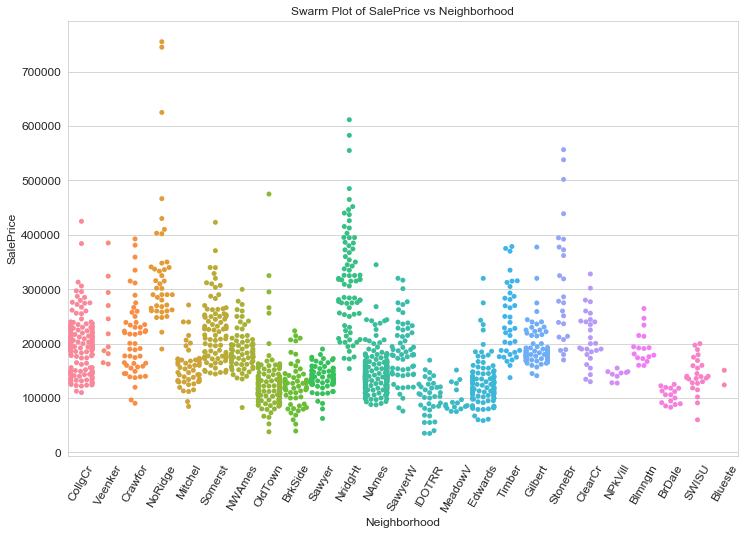

In [39]:
plot_catvariable('Neighborhood')

Neighborhood: This variable has 25 categories. Overall it looks like each category has differentiated range in SalePrice.Most categories also have an almost equally distributed counts. Few categories look similar in spread and average SalePrice like OldTown, BrkSide and Edwards. Overall, the outliers are few except in NoRidge and NridgHT, where there are high priced houses.

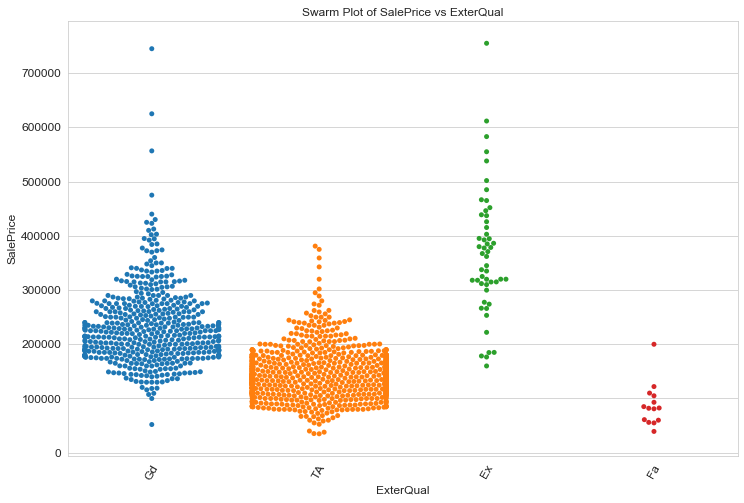

In [40]:
plot_catvariable('ExterQual')

The categories TA and Gd almost have a equal counts. The average SalePrice of Gd is higher than TA. There are high prized houses in Gd and Ex category, which look like outliers.

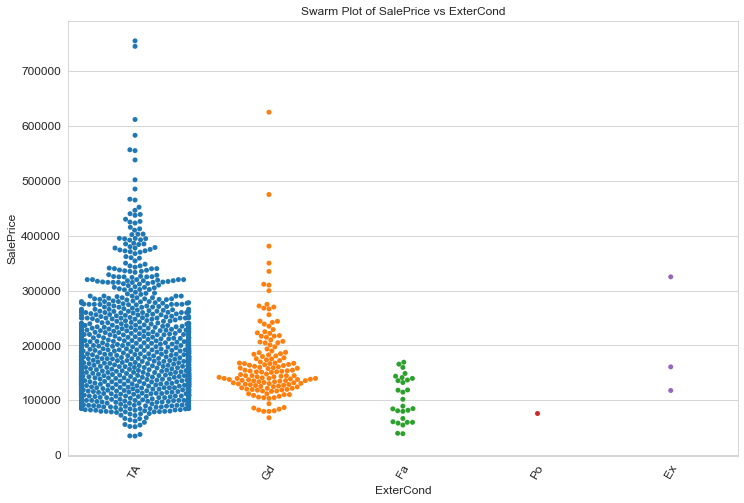

In [41]:
plot_catvariable('ExterCond')

Category TA dominates in counts and has a higher average SalePrice, compared to Gd. Both reflect few outlier points

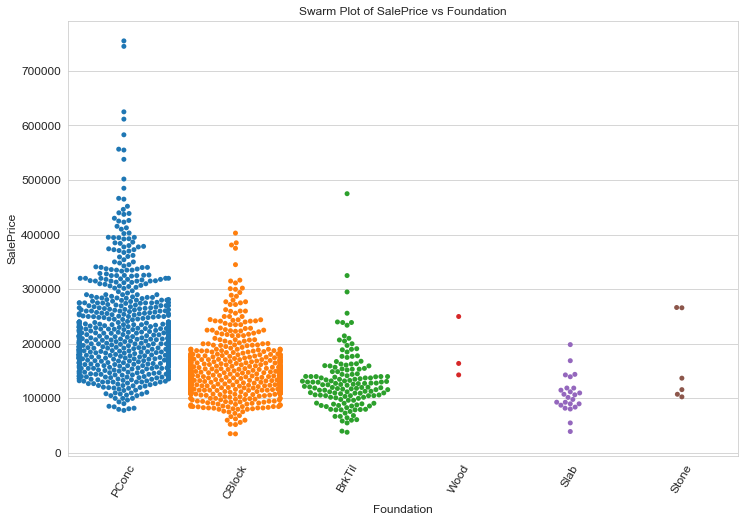

In [42]:
plot_catvariable('Foundation')

The range in SalePrice and average SalePrice is differentiated in the 3 categories-PConc, CBlock, and BrkTil. The counts vary, with PConc count leading and followed by CBlock. Very high SalePrice points are seen in category PConc.

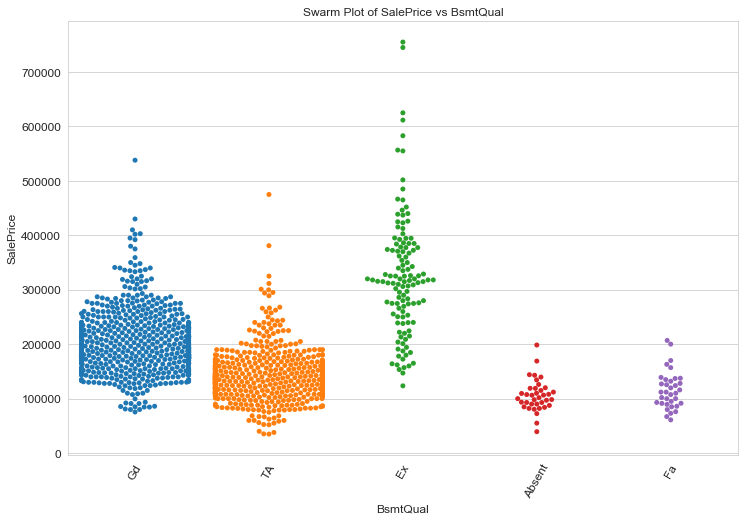

In [43]:
plot_catvariable('BsmtQual')

The SalePrice range in the 3 categories- Gd,TA and Ex differs. The counts of Gd category is the highest, followed by TA. The average SalePrice of Ex category is highest, followed by Gd category, and also shows some outliers.

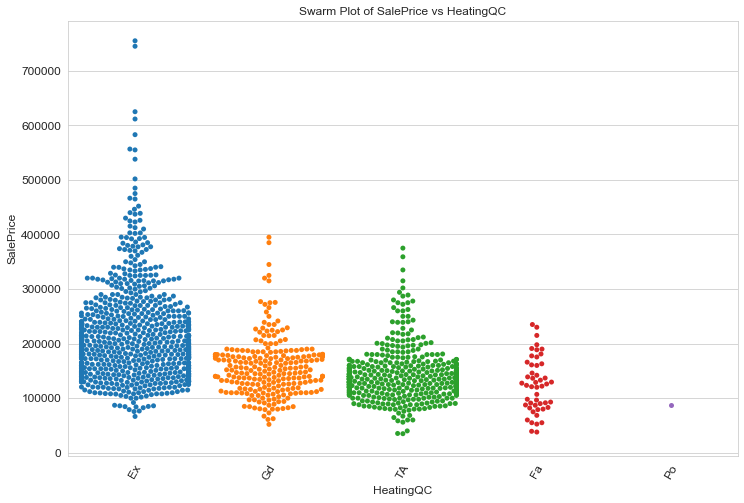

In [44]:
plot_catvariable('HeatingQC')

The average Saleprice is differentiated in between categories.The count of Ex category is highest. This category has high SalePrice points as well.

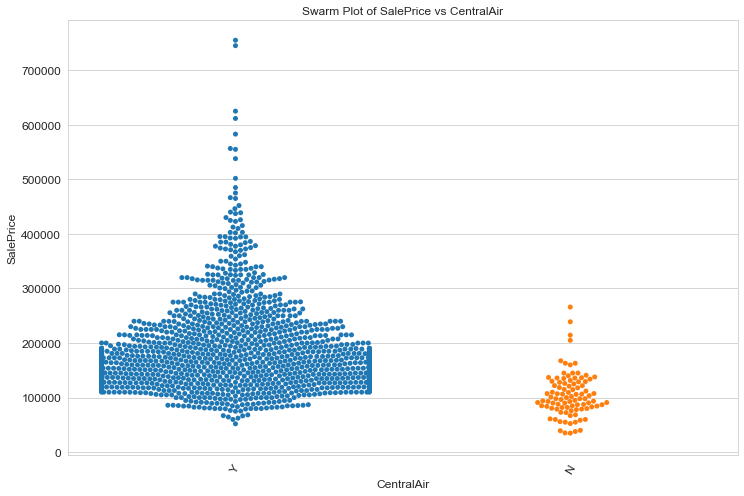

In [45]:
plot_catvariable('CentralAir')

The average SalePrice in N category is lower and the counts in this category is far lower.

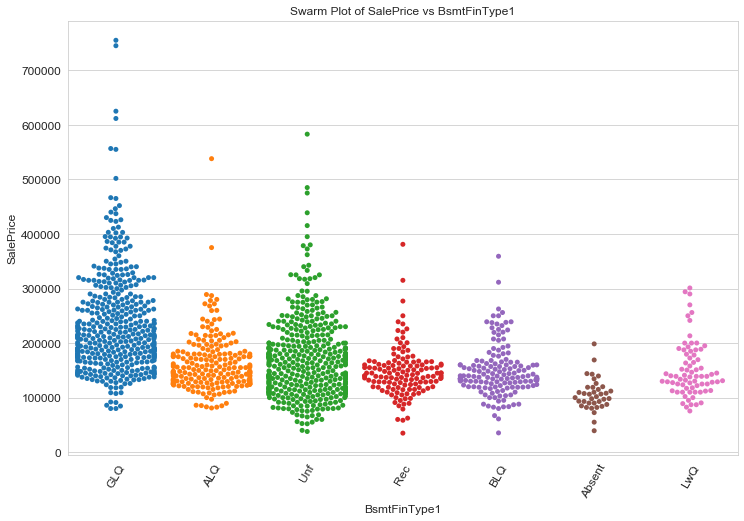

In [46]:
plot_catvariable('BsmtFinType1')

 The Average SalePrice and range differs in the 3 categories GLQ, ALQ and Unf, with GLQ leading and having almost equal counts with Unf. GLQ, ALQ and Unf category also have presence of outliers.

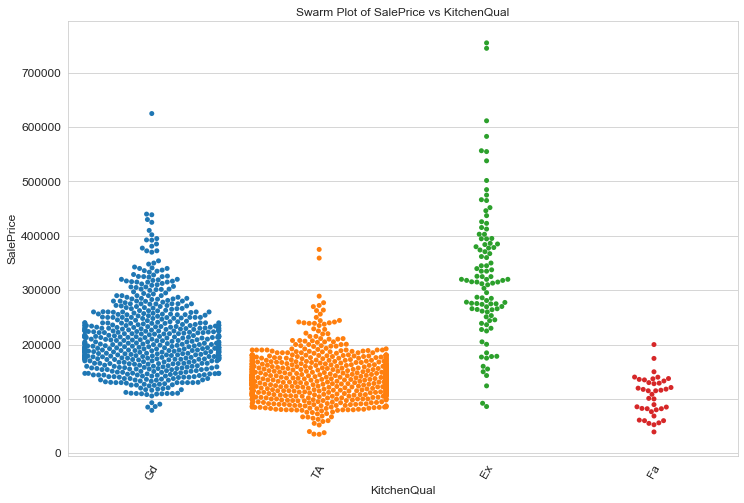

In [47]:
plot_catvariable('KitchenQual')

The categories Gd, TA and Ex have differentiated SalePrice range and Average price with Ex having the highest Average SalePrice and Gd having the highest counts. Few outliers are there in category Ex.

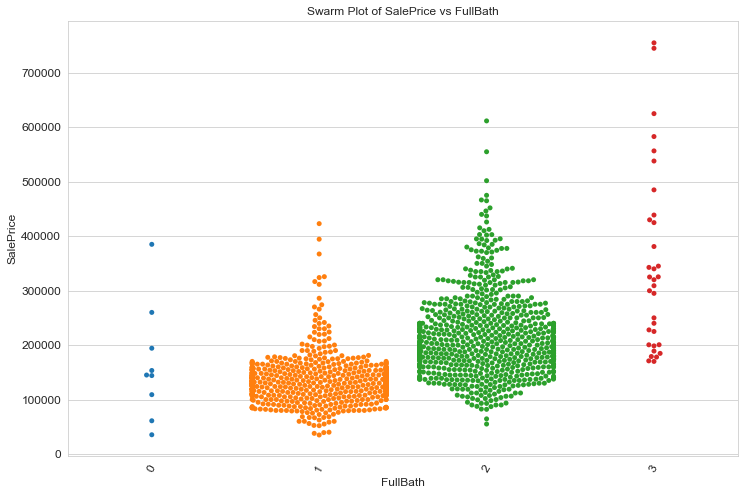

In [48]:
plot_catvariable('FullBath')

This variable has different Sale Price range and average SalePrice in 3 categories- 1,2, and 3, with 3 having the highest Avg SalePrice followed by category 2. Counts are highest for category 1 followed by category 2.

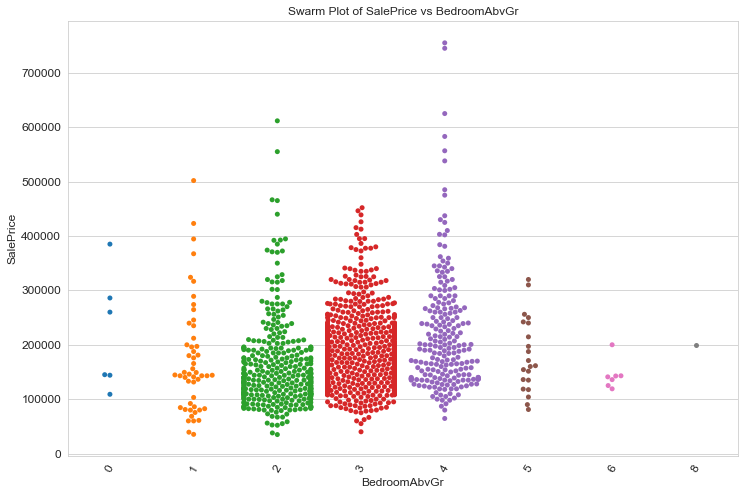

In [49]:
plot_catvariable('BedroomAbvGr')

This variable has maximum counts spread between categories 2,3,4 wit 3 being highest in count. Spread in Saleprice and Average SalePrice varies slightly between these categories.

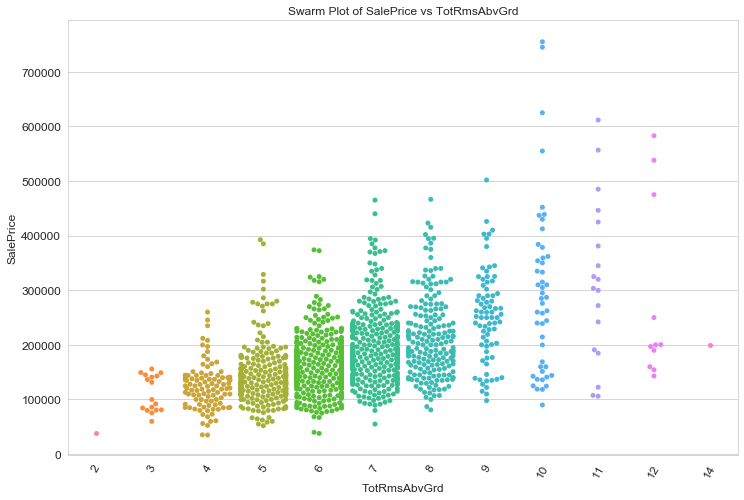

In [50]:
plot_catvariable('TotRmsAbvGrd')

The categories in this variable are differentiated in terms of range in Saleprice and Average Saleprice.

### Transforming labels of categorical variables.
Basis our observations we find that there are categories, sensitive to Average Saleprice. For incluing these variables in the prediction models we need to assign them numerical options. Here, have assigned the labels based on average SalePrice.
There are also other options available with OneHotEcoder and LabelEncoder for this job.

The year related columns : 'YearBuilt','YearRemodAdd','GarageYrBlt' , have no significance in numerical calculations. However it is important as it arranges data as per time to reflect trends. Here we have included year column in categorical list for conversion to represent a numeric value. This numeric value itself captures the trend.  

In [51]:
# Function for assigning numeric labels for categorical variables
def train_category_conversion(col):
    a=train.groupby(col)['SalePrice'].mean()
    a=round((a/10000),2)
    index=a.index.values.tolist()
    weight=a.values.tolist()
    zipped=list(zip(index,weight))
    dict1=dict(zipped)
    train[col]=train[col].map(dict1)
# Function for assigning numeric labels for categorical variables-Test Set
def test_category_conversion(col):
    a=test.groupby(col)['SalePrice'].mean()
    a=round((a/10000),2)
    index=a.index.values.tolist()
    weight=a.values.tolist()
    zipped=list(zip(index,weight))
    dict1=dict(zipped)
    test[col]=test[col].map(dict1)


In [52]:
# We have created a new variable so we delete the old ones.
droplist=['TotalBsmtSF','1stFlrSF','GrLivArea']
train=train.drop(droplist, axis=1)
for col in droplist:
    numcollist.remove(col)
numcollist.append('newsqvar')



In [53]:
# Passing function to provide numeric labels to categorical variables
for col in categlist:
    train_category_conversion(col)

In [54]:
# Saving the dataframe with all changes to a new one.
train.to_csv('cleaned_train.csv')